In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


In [2]:
#Importing The Dataset
retail = pd.read_csv('Online Retail.csv')

In [3]:
#First five rows of the datset
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
#Checking for missing data
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#Checking for column datatypes
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#Number Of rows and columns
retail.shape

(541909, 8)

In [ ]:
#SALES PERFORMANCE

In [7]:
# Total Sales (We do this by creating a new column for the total sales, which is a sum of each Unit price and quantity sold)
retail['Total Sales'] = retail['Quantity'] * retail ['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [8]:
#Total Sales
retail['Total Sales'].sum()

9747747.933999998

In [9]:
#Products With Highest Number Of Sales
Sales_Qty = retail.Description.value_counts().reset_index()
Sales_Qty.head(10)

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2369
1,REGENCY CAKESTAND 3 TIER,2200
2,JUMBO BAG RED RETROSPOT,2159
3,PARTY BUNTING,1727
4,LUNCH BAG RED RETROSPOT,1638
5,ASSORTED COLOUR BIRD ORNAMENT,1501
6,SET OF 3 CAKE TINS PANTRY DESIGN,1473
7,PACK OF 72 RETROSPOT CAKE CASES,1385
8,LUNCH BAG BLACK SKULL.,1350
9,NATURAL SLATE HEART CHALKBOARD,1280


<function matplotlib.pyplot.show(close=None, block=None)>

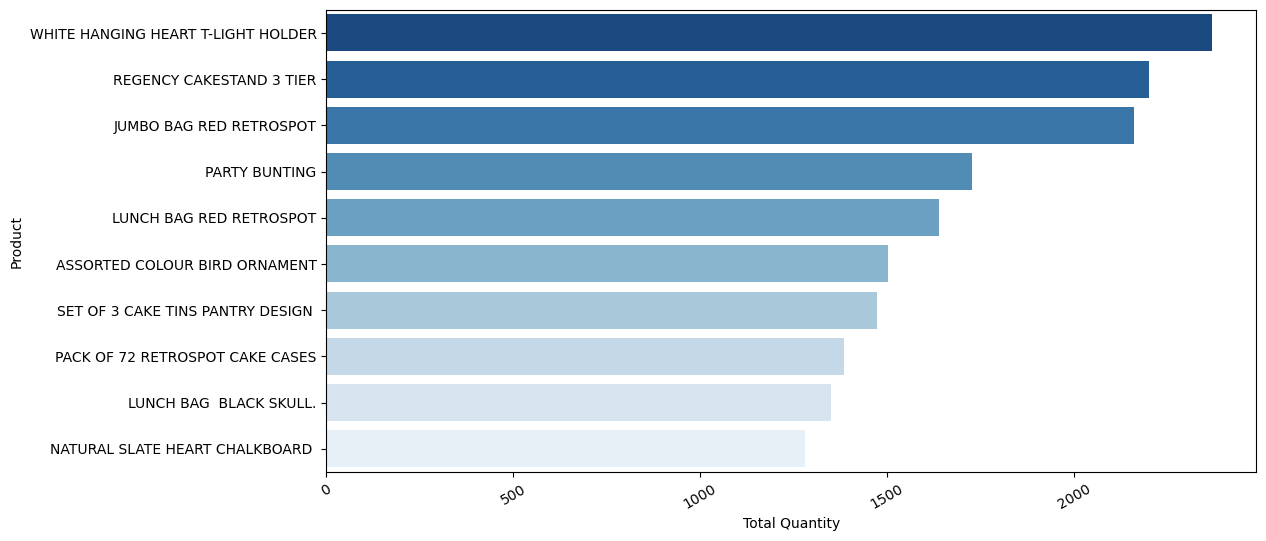

In [9]:
#Barplot Visualizing Top Selling Products Based On Quantity

plt.figure(figsize= (12,6))
sns.barplot(data=Sales_Qty.head(10), y='Description', x='count', hue='Description', palette="Blues_r")
plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.xticks(rotation = 30)
plt.show

In [10]:
#Top Selling Products
Top_Selling = retail.groupby('Description')['Total Sales'].sum().sort_values(ascending = False).reset_index()
Top_Selling.head(10)

,Description,Total Sales
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03
5,RABBIT NIGHT LIGHT,66756.59
6,POSTAGE,66230.64
7,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
8,ASSORTED COLOUR BIRD ORNAMENT,58959.73
9,CHILLI LIGHTS,53768.06


<function matplotlib.pyplot.show(close=None, block=None)>

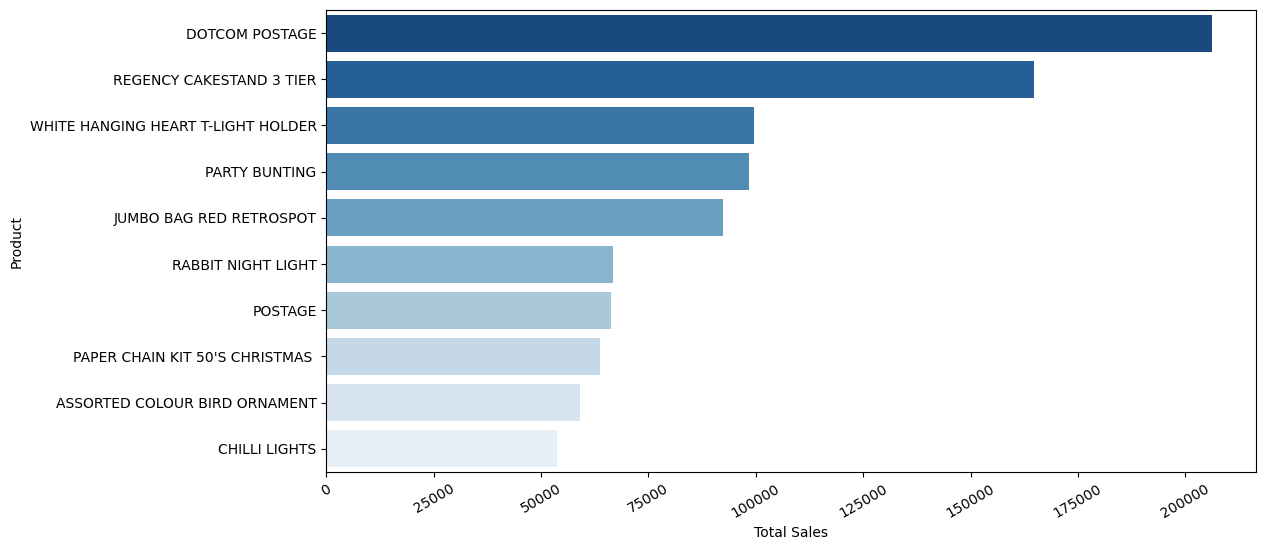

In [25]:
#Barplot Visualizing Top Selling Products Based On Revenue

plt.figure(figsize= (12,6))
sns.barplot(data=Top_Selling.head(10), y='Description', x='Total Sales', hue='Description', palette="Blues_r")
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.xticks(rotation = 30)
plt.show

In [61]:
RQ_summary = retail.groupby('Description').agg(Total_rev = ('Total Sales', 'sum'), Sales_Qty = ('Quantity', sum)).sort_values(by='Total_rev', ascending = False).reset_index()
RQ_summary.head(15)

,Description,Total_rev,Sales_Qty
0,DOTCOM POSTAGE,206245.48,707
1,REGENCY CAKESTAND 3 TIER,164762.19,13033
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47,35317
3,PARTY BUNTING,98302.98,18022
4,JUMBO BAG RED RETROSPOT,92356.03,47363
5,RABBIT NIGHT LIGHT,66756.59,30680
6,POSTAGE,66230.64,3003
7,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94,18902
8,ASSORTED COLOUR BIRD ORNAMENT,58959.73,36381
9,CHILLI LIGHTS,53768.06,10229


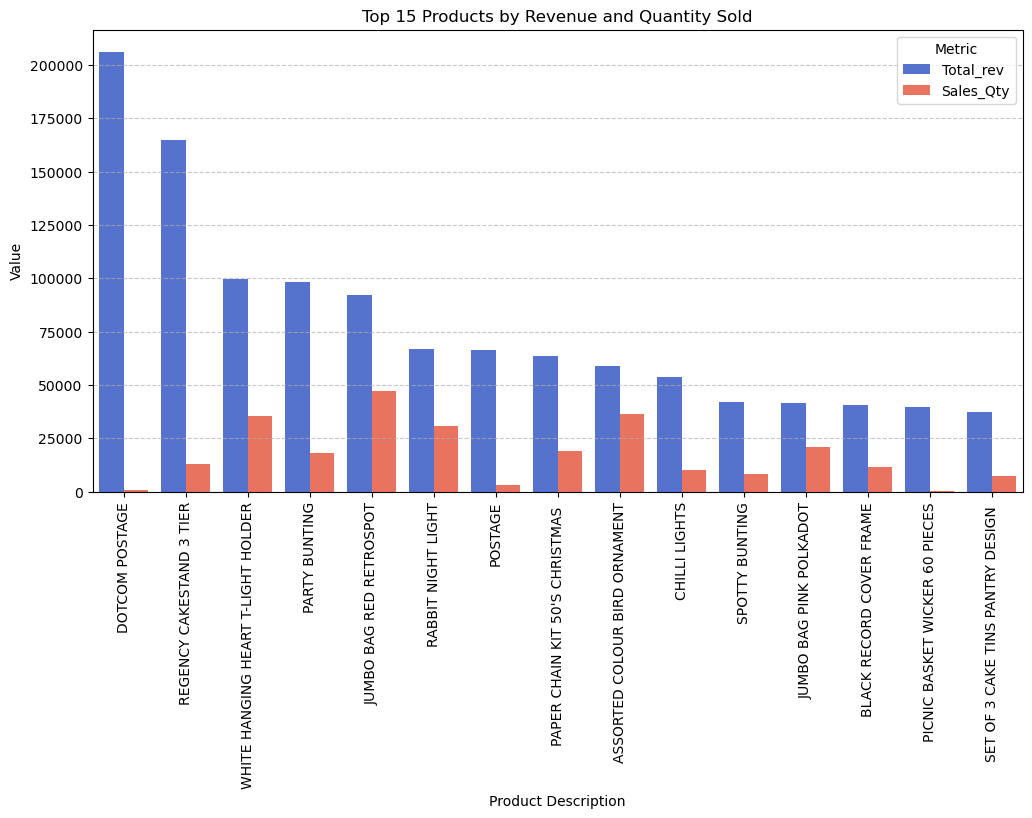

In [14]:
# Select top 15 products
top_products = RQ_summary.head(15)

# Reshape the data for seaborn
melted_df = top_products.melt(id_vars="Description", value_vars=["Total_rev", "Sales_Qty"], var_name="Metric", value_name="Value")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x="Description", y="Value", hue="Metric", palette=["royalblue", "tomato"])

# Adjustments
plt.xticks(rotation=90)
plt.title("Top 15 Products by Revenue and Quantity Sold")
plt.xlabel("Product Description")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metric")

plt.show()


In [19]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total Sales'],
      dtype='object')

In [20]:
#Revenues By Product
Top_Revenue = retail.groupby('StockCode')['Total Sales'].sum().sort_values(ascending = False)
Top_Revenue.head(10)

StockCode
DOT       206245.48
22423     164762.19
47566      98302.98
85123A     97894.50
85099B     92356.03
23084      66756.59
POST       66230.64
22086      63791.94
84879      58959.73
79321      53768.06
Name: Total Sales, dtype: float64

In [31]:
#Sales Trends Over Time
# Convert InvoiceDate to datetime
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

# Creating a New Column For Year-Month
retail['Year_Month'] = retail['InvoiceDate'].dt.to_period('M')

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales,Year_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [47]:
retail['Year_Month'] = retail['Year_Month'].astype(str)

retail['Year'] = retail['Year_Month'].str.extract(r'(\d{4})')
retail['Month'] = retail['Year_Month'].str.extract(r'-(\d{1,2})')


retail['Month'] = retail['Month'].astype(str)
retail['Year'] = retail['Year'].astype(str)

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales,Year_Month,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12


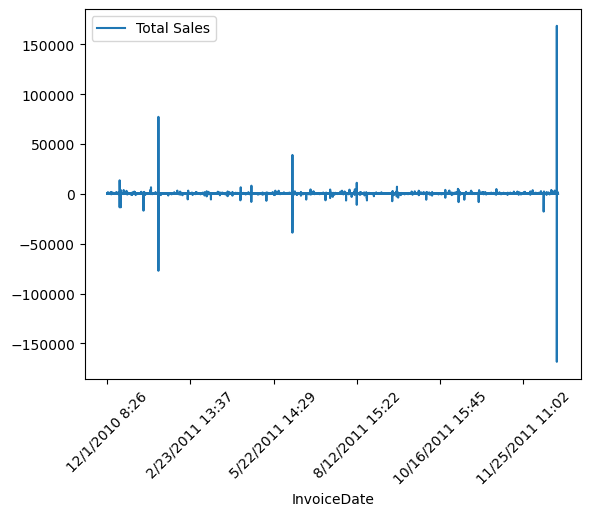

In [25]:
retail.plot(x='InvoiceDate', y='Total Sales', kind='line', rot=45)
plt.show()

In [48]:
monthly_sales=retail.groupby('StockCode')['Total Sales'].sum().sort_values(ascending = False).reset_index()
monthly_sales.head()

,StockCode,Total Sales
0,DOT,206245.48
1,22423,164762.19
2,47566,98302.98
3,85123A,97894.50
4,85099B,92356.03


In [49]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Total Sales  541909 non-null  float64       
 9   Year_Month   541909 non-null  object        
 10  Year         541909 non-null  object        
 11  Month        541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 49.6+ MB


In [69]:
#Average Order Value

Total_Rev = retail['Total Sales'].sum()
Total_Rev
print('Total Reveue\n',Total_Rev)

Total_Qty = retail['Quantity'].sum()
Total_Rev
print('Total Quantity Of Orders\n',Total_Qty)


AOV = Total_Rev/Total_Qty

print(AOV)

Total Reveue
 9747747.933999998
Total Quantity Of Orders
 5176450
1.8830951586511988


In [ ]:
#CUSTOMER BEHAVIOUR

In [5]:
#Customer Behaviour
customer_count = retail['CustomerID'].value_counts().reset_index()
customer_count.head(10)


,CustomerID,count
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
5,15311.0,2491
6,14646.0,2085
7,13089.0,1857
8,13263.0,1677
9,14298.0,1640


In [10]:
customer_purchase = retail.groupby('CustomerID')['Total Sales'].sum().sort_values(ascending = False).reset_index()
customer_purchase.head(15)

,CustomerID,Total Sales
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187482.17
3,14911.0,132572.62
4,12415.0,123725.45
5,14156.0,113384.14
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62653.10
9,15311.0,59419.34


In [22]:
customer_qty = retail.groupby('CustomerID')['Quantity'].sum().sort_values(ascending = False).reset_index()
customer_qty.head(15)

,CustomerID,Quantity
0,14646.0,196719
1,12415.0,77242
2,14911.0,77180
3,17450.0,69029
4,18102.0,64122
5,17511.0,63012
6,13694.0,61803
7,14298.0,58021
8,14156.0,57025
9,16684.0,49390


In [40]:
customer_summary = retail.groupby('CustomerID').agg(Total_rev = ('Total Sales', 'sum'), Sales_Qty = ('Quantity', sum)).sort_values(by='Total_rev', ascending = False).reset_index()
customer_summary.head()

C:\Users\Emigb\AppData\Local\Temp\ipykernel_28544\862998257.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  customer_summary = retail.groupby('CustomerID').agg(Total_rev = ('Total Sales', 'sum'), Sales_Qty = ('Quantity', sum)).sort_values(by='Total_rev', ascending = False).reset_index()


,CustomerID,Total_rev,Sales_Qty
0,14646.0,279489.02,196719
1,18102.0,256438.49,64122
2,17450.0,187482.17,69029
3,14911.0,132572.62,77180
4,12415.0,123725.45,77242


In [43]:
country_rev = retail.groupby('Country')['Total Sales'].sum().sort_values(ascending = False).reset_index()
country_rev.head(10)

,Country,Total Sales
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


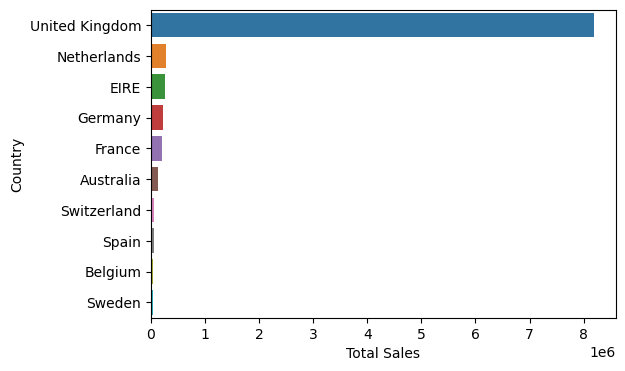

In [57]:
plt.figure(figsize=(6,4))
sns.barplot(data=country_rev.head(10), x='Total Sales', y='Country', hue='Country')
plt.show()

In [58]:
country_qty = retail.groupby('Country')['Quantity'].sum().sort_values(ascending = False).reset_index()
country_qty.head(10)

,Country,Quantity
0,United Kingdom,4263829
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480
5,Australia,83653
6,Sweden,35637
7,Switzerland,30325
8,Spain,26824
9,Japan,25218


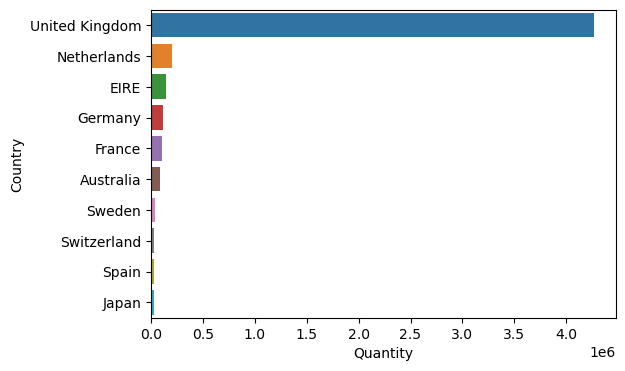

In [59]:
plt.figure(figsize=(6,4))
sns.barplot(data=country_qty.head(10), x='Quantity', y='Country', hue='Country')
plt.show()

In [64]:
country_summary = retail.groupby('Country').agg(Total_rev = ('Total Sales', 'sum'), Sales_Qty = ('Quantity', sum)).sort_values(by='Total_rev', ascending = False).reset_index()
country_summary.head(10)

,Country,Total_rev,Sales_Qty
0,United Kingdom,8187806.364,4263829
1,Netherlands,284661.540,200128
2,EIRE,263276.820,142637
3,Germany,221698.210,117448
4,France,197403.900,110480
5,Australia,137077.270,83653
6,Switzerland,56385.350,30325
7,Spain,54774.580,26824
8,Belgium,40910.960,23152
9,Sweden,36595.910,35637


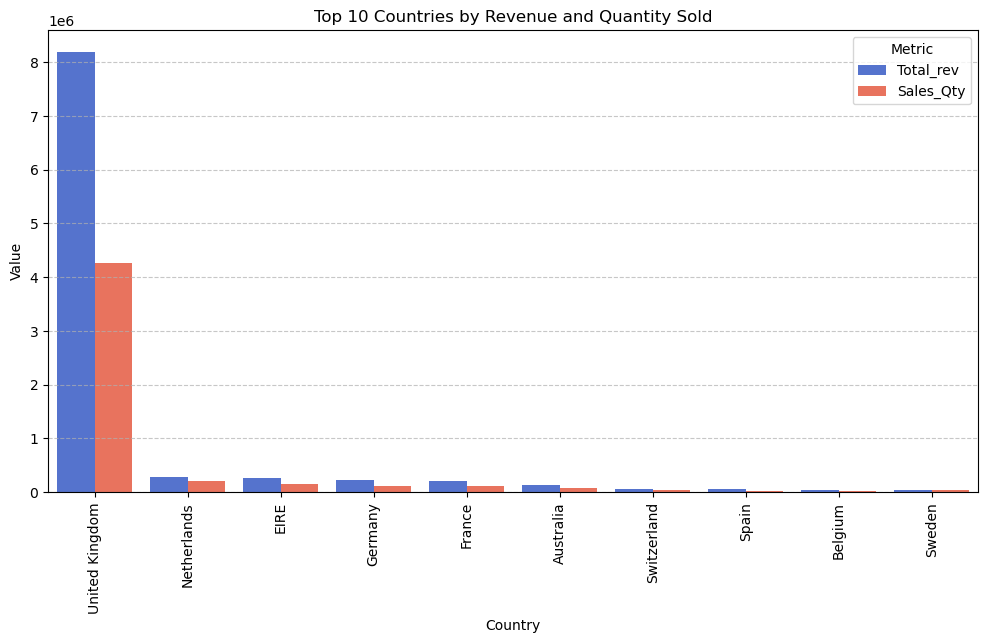

In [66]:
# Select top 15 products
top_countries = country_summary.head(10)

# Reshape the data for seaborn
melted = top_countries.melt(id_vars="Country", value_vars=["Total_rev", "Sales_Qty"], var_name="Metric1", value_name="Value")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x="Country", y="Value", hue="Metric1", palette=["royalblue", "tomato"])

# Adjustments
plt.xticks(rotation=90)
plt.title("Top 10 Countries by Revenue and Quantity Sold")
plt.xlabel("Country")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metric")

plt.show()


In [27]:
retail.describe()

,Quantity,UnitPrice,CustomerID,Total Sales
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [11]:
#PRODUCT PERFORMACE

In [12]:
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


In [17]:
#Product Sales
product_sales = retail.groupby('Description')['Total Sales'].sum().sort_values(ascending = False).reset_index()
product_sales.head()

,Description,Total Sales
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03


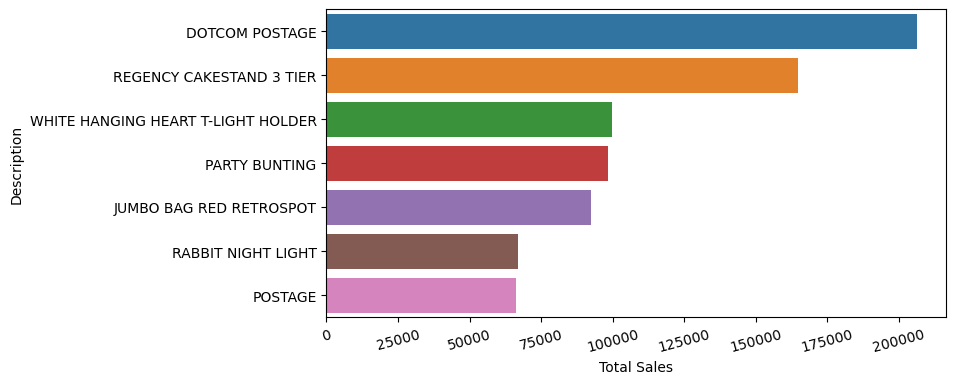

In [24]:
plt.figure(figsize = (8,4))
sns.barplot(data=product_sales.head(7), x='Total Sales', y='Description', hue = 'Description')
plt.xticks(rotation = 15)
plt.show()

In [15]:
product_sales.tail()

Description
Bank Charges        -7175.639
CRUK Commission     -7933.430
Adjust bad debt    -11062.060
Manual             -68671.640
AMAZON FEE        -221520.500
Name: Total Sales, dtype: float64

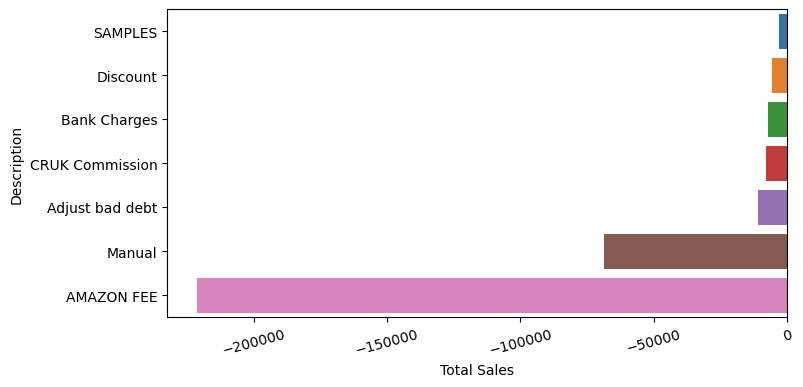

In [23]:
plt.figure(figsize = (8,4))
sns.barplot(data=product_sales.tail(7), x='Total Sales', y='Description', hue = 'Description')
plt.xticks(rotation = 15)
plt.show()

In [29]:
negative_val = retail[retail['Quantity'] < 0].reset_index()
negative_val

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales
0,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
1,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
2,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
3,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
4,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...,...
10619,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,-9.13
10620,541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,-224.69
10621,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,-54.75
10622,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,-1.25


In [36]:
neg_prod = negative_val['Description'].value_counts().reset_index()
neg_prod.head(10)

,Description,count
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,check,120
4,JAM MAKING SET WITH JARS,87
5,Discount,77
6,SET OF 3 CAKE TINS PANTRY DESIGN,74
7,SAMPLES,61
8,STRAWBERRY CERAMIC TRINKET BOX,55
9,ROSES REGENCY TEACUP AND SAUCER,54
